<style type="text/css">
.time_spent {
    width: 3em;
    border-style: none;
    background-color: silver;
    font-weight: bold;
    padding-left: 5px;
}
</style>

# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, SS17

# Assignment 7: Ordinary Differential Equations 2

As part of your preparation for the Midterm, look into how you can use Python to write clean/efficient code.
For example: https://www.youtube.com/watch?v=OSGv2VnC0go

In [2]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize, getfigs
import IPython

### 1. Population dynamics [70]

The following section is an excerpt from *Fundamentals of Differential Equations*, 8th Ed, by Nagle, Saff and Snider.

"A mathematical model for the population dynamics of competing species, one a predator with
population $x_2(t)$ and the other its prey with population $x_1(t)$ , was developed independently in the
early 1900s by A. J. Lotka and V. Volterra. It assumes that there is plenty of food available for the
prey to eat, so the birthrate of the prey should follow the Malthusian or exponential law (see Section 3.2); that is, the birthrate of the prey is $Ax_1$ , where $A$ is a positive constant. The death rate of
the prey depends on the number of interactions between the predators and the prey. This is modeled by the expression $Bx_1x_2$ , where $B$ is a positive constant. Therefore, the rate of change in the
population of the prey per unit time is $\frac{dx_1}{dt} = Ax_1 - Bx_1x_2$ . Assuming that the predators
depend entirely on the prey for their food, it is argued that the birthrate of the predators depends
on the number of interactions with the prey; that is, the birthrate of predators is $Dx_1x_2$ , where $D$ is
a positive constant. The death rate of the predators is assumed to be $Cx_2$ because without food the
population would die off at a rate proportional to the population present. Hence, the rate of
change in the population of predators per unit time is $\frac{dx_2}{dt} = -Cx_2 + Dx_1x_2$ . Combining these
two equations, we obtain the Volterra–Lotka system for the population dynamics of two competing species:
$$ x_1^\prime = Ax_1 - Bx_1x_2 \quad\quad(1)$$
$$ x_2^\prime = -Cx_2 + Dx_1x_2  \quad\quad(2)$$
Such systems are in general not explicitly solvable."


<br/>
<br/>
What they have described here is the modelling of population dynamics using a system of non-linear first-order differential equations. The equations of the form shown above are also called Lotka–Volterra equations or predator-prey equations; (1) is the equation for the prey and (2) is the equation for the predator.

In this assignment, your task is to solve one such system using vectorized 4th order Runge-Kutta.


In the [Star Wars Rebels](https://en.wikipedia.org/wiki/Star_Wars_Rebels) series, the [Jedi](http://starwars.wikia.com/wiki/Jedi) are being hunted down and killed by the [Inquisitors](http://starwars.wikia.com/wiki/Inquisitorius). If the Inquisitors do not want to be imprisoned and killed by Darth Vader, they have to keep hunting the Jedi.

The population dynamics of both the Jedi (prey) and the Inquisitors (predators) can be modelled using the differential equations (1) and (2). Solve them numerically using $A$ = 10.0, $B$ = 7.0, $C$ = 3.0 and $D$ = 5.0. Assume that the initial populations of the Jedi and Inquisitors are 60 and 25 respectively. Use a step size, $h = 0.01$, and run the Runge-Kutta solver for at least 200 iterations and plot the resulting population curve over time. Your solution should look something like the image below.

The following are the equations for 4th order Runge-Kutta (also partially from *Fundamentals of Differential Equations*):

$$ x_1^\prime = f(t, x_1, x_2) $$
$$ x_2^\prime = g(t, x_1, x_2) $$
<br/>
$$ t_{n+1} = t_n + h $$
$$ x_{1,n+1} = x_{1,n} + \frac{1}{6}[k_{1,1} + 2k_{1,2} + 2k_{1,3} + k_{1,4}]$$
$$ x_{2,n+1} = x_{2,n} + \frac{1}{6}[k_{2,1} + 2k_{2,2} + 2k_{2,3} + k_{2,4}]$$
<br/>
$$k_{1,1} = h \cdot f(t_n, x_{1,n}, y_{1,n})$$
$$k_{1,2} = h \cdot f(t_n + \frac{h}{2}, x_1 + \frac{k_{1,1}}{2},  x_2 + \frac{k_{2,1}}{2})$$
$$k_{1,3} = h \cdot f(t_n + \frac{h}{2}, x_1 + \frac{k_{1,2}}{2},  x_2 + \frac{k_{2,2}}{2})$$
$$k_{1,4} = h \cdot f(t_n + h, x_1 + k_{1,3}, x_2 + k_{2,3})$$
<br/>
$$k_{2,1} = h \cdot g(t_n, x_{1,n}, y_{1,n})$$
$$k_{2,2} = h \cdot g(t_n + \frac{h}{2}, x_1 + \frac{k_{1,1}}{2},  x_2 + \frac{k_{2,1}}{2})$$
$$k_{2,3} = h \cdot g(t_n + \frac{h}{2}, x_1 + \frac{k_{1,2}}{2},  x_2 + \frac{k_{2,2}}{2})$$
$$k_{2,4} = h \cdot g(t_n + h, x_1 + k_{1,3}, x_2 + k_{2,3})$$

Your solution should look something like this:

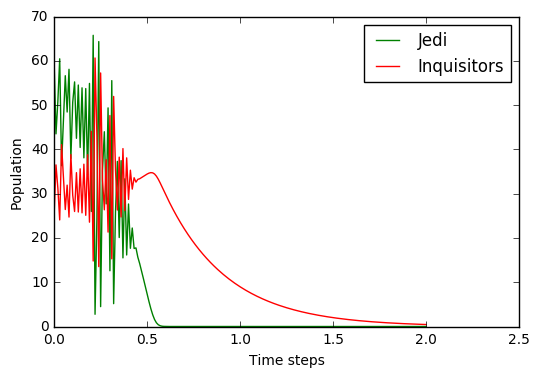

In [4]:
IPython.core.display.Image("images/predator_prey_example.png", embed=True)

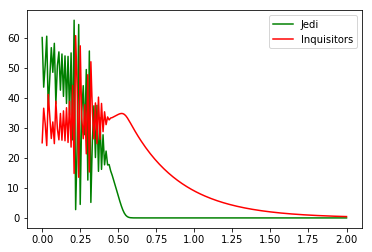

In [4]:
max_iterations=200
h = 0.01

x1_0 = 60
x2_0 = 25
t_0 = 0

"""
x1_prime: Function gives the value of the derivative dx1/dt 
         at x1,x2,t

Population growth rate for Jedi
"""
def f(t, x1, x2):
    return 10*x1-7*x1*x2



"""
x2_prime: Function gives the value of the derivative dx2/dt 
         at x1,x2,t

Population growth rate for Inquisitors
"""
def g(t, x1, x2):
    return -3*x2+5*x1*x2


"""
R_K : Function returns the population esitmates and times of Jedis and Inquisitors
      using fourth-order Runge-Kutta 


@a ic  : Initial values ic[0]: x1(0), and ic[1]: x2(0) and ic[2]: t(0)
@a h   : Step size

"""
def R_K(ic, h):
    
    x1_current = ic[0]
    x2_current = ic[1]
    t_current = ic[2]
    i=0
    
    X_1 = []
    X_2 = []
    Time = []

    
    X_1.append(x1_current)
    X_2.append(x2_current)
    Time.append(t_current)
    #Loop until maximum number of iterations is reached
    while(i<max_iterations):
        
        k11 = h*f(t_current, x1_current, x2_current)
        k21 = h*g(t_current, x1_current, x2_current)
       
        k12 = h*f(t_current+h/2, x1_current+k11/2, x2_current+k21/2)
        k22 = h*g(t_current+h/2, x1_current+k11/2, x2_current+k21/2)
       
        k13 = h*f(t_current+h/2, x1_current+k12/2, x2_current+k22/2)
        k23 = h*g(t_current+h/2, x1_current+k12/2, x2_current+k22/2)
       
        k14 = h*f(t_current+h, x1_current+k13, x2_current+k23)
        k24 = h*g(t_current+h, x1_current+k13, x2_current+k23)
               
        k1 = k11+2*k12+2*k13+k14
        k2 = k21+2*k22+2*k23+k24
        
        x1_current = (x1_current + (k1/6))       # update x1 using RK-4
        x2_current = (x2_current + (k2/6))       # update x2 using RK-4
        t_current=t_current+h
        
        X_1.append(x1_current)
        X_2.append(x2_current)
        Time.append(t_current)
        
        i += 1                                   # increment iternation by step size
        
    return (X_1,X_2,Time)



ic = np.array([x1_0, x2_0, t_0])
X_1,X_2,Time=R_K(ic, h)

X_1=np.array(X_1)
X_2=np.array(X_2)
Time=np.array(Time)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(Time, X_1, color='g', label='Jedi')
ax.plot(Time, X_2, color='r', label='Inquisitors')
plt.legend()
plt.show()



### 2. Representing higher order ODEs as a system of ODEs [10]

Represent the following equation as a system of first order ODEs. You do not need to solve them.
$$y''' + 3y'' - y' - 12y - 10 = 0$$

###### Solution
---

Given, $$y''' + 3y'' - y' - 12y - 10 = 0$$
Let,
\begin{align*}
    &z_1 = y \\
    &z_1' = y'= z_2 \\
    &z_2' = y''= z_3 \\
\end{align*}
So,
\begin{align*}
    z_3' = y''' &= -3y''+y'+12y+10\\
    & = -3z_3+z_2+12z_1+10
\end{align*}
    

We can rewrite our equation as:

\begin{equation}
\begin{pmatrix}
z_1' \\ z_2' \\ z_3'
\end{pmatrix}
=
\begin{bmatrix} 
0  & 1 & 0 \\
0  & 0 & 1 \\
12 & 1 & -3
\end{bmatrix} 
\begin{pmatrix}
z_1 \\ z_2 \\ z_3
\end{pmatrix}
+
\begin{pmatrix}
0 \\ 0 \\ 10
\end{pmatrix}
\end{equation}

This is a system of first order ODEs.


---